In [34]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.initializers import Zeros
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pickle
from mpl_toolkits.mplot3d import Axes3D

In [42]:
np.random.seed(1)
n_samples = 250
X, _ = np.random.uniform(-5, 5, size=(n_samples, 2)), None 

layer1_feature = (np.sin(X[:, 0] * 0.5) + np.cos(X[:, 1] * 0.5)) > 0
layer2_feature = (X[:, 0] ** 2 + X[:, 1] ** 2) > 15
y = (layer1_feature ^ layer2_feature).astype(int)

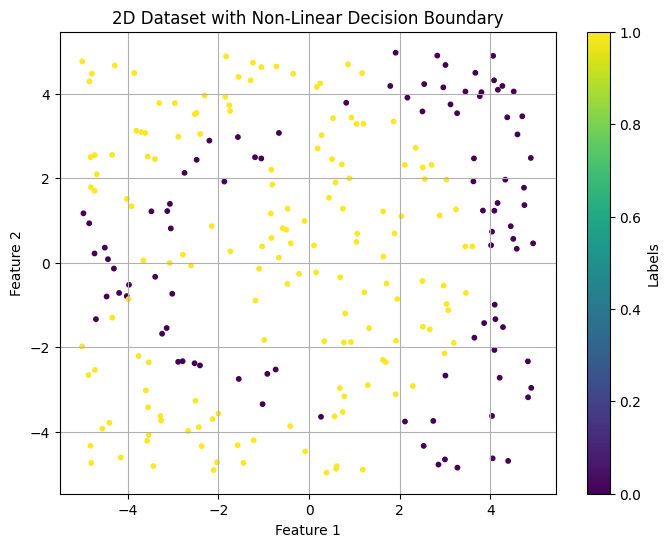

X shape: (250, 2)
y shape: (250,)


In [43]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(scatter, label='Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset with Non-Linear Decision Boundary')
plt.grid(True)
plt.show()

# Save for training
print("X shape:", X.shape)
print("y shape:", y.shape)

In [45]:
# Build the model using Input layer
inputs = keras.layers.Input(shape=(2,))
hidden1 = keras.layers.Dense(3, activation="sigmoid", name="hidden_layer_1")(inputs)
hidden2 = keras.layers.Dense(3, activation="sigmoid", name="hidden_layer_2")(hidden1)
outputs = keras.layers.Dense(1, activation="sigmoid", name="output_layer")(hidden2)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss="binary_crossentropy")

#hidden space storage
hidden_space_trajectory = []
original_points = X  # Store the original points

hidden_layer_1_model = keras.Model(inputs=model.input, outputs=model.get_layer("hidden_layer_1").output)
hidden_layer_2_model = keras.Model(inputs=model.input, outputs=model.get_layer("hidden_layer_2").output)

In [ ]:
# Train the model for all epochs and record the hidden space every 10 epochs
epochs_per_interval = 10
total_epochs = 300
hidden_space_trajectory = []

for epoch in range(1, total_epochs + 1):
    # Train for one epoch at a time to monitor progress
    model.fit(X, y, epochs=1, verbose=1)

    # Record the hidden space trajectory every 10 epochs
    if epoch % epochs_per_interval == 0:
        # Inspect weights
        weights_hidden1 = model.get_layer("hidden_layer_1").get_weights()[0]
        weights_hidden2 = model.get_layer("hidden_layer_2").get_weights()[0]
        print(f"Weights of hidden layer 1 after {epoch} epochs:\n{weights_hidden1}")
        print(f"Weights of hidden layer 2 after {epoch} epochs:\n{weights_hidden2}")

        hidden1_positions = hidden_layer_1_model.predict(X)
        hidden2_positions = hidden_layer_2_model.predict(X)
        hidden_space_trajectory.append({
            "hidden_layer_1": hidden1_positions,
            "hidden_layer_2": hidden2_positions
        })
        print(f"Recorded hidden space at epoch {epoch}")

# Convert hidden_space_trajectory to numpy array for storage
hidden_space_trajectory = np.array(hidden_space_trajectory)
print(f"Hidden space trajectory shape: {hidden_space_trajectory.shape}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.6639
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6495
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6684  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6515  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6479  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6210
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.6457
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6411
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.6333
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.6483
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6485  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6199 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6340  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6307  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.6492
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.6132
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6035  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.5952
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [29]:
# Save the trajectory and original points to a pickle file
with open("hidden_space_and_points.pkl", "wb") as f:
    pickle.dump({
        "hidden_space_trajectory": hidden_space_trajectory, 
        "original_points": original_points, 
        "labels": y},
        f)

In [28]:
for epoch_index, hidden_layers in enumerate(hidden_space_trajectory):
    current_frame =  epoch_index

    print(hidden_layers["hidden_layer_1"])

[[4.23043966e-01 1.49242496e-02 4.54963952e-01]
 [3.57448608e-01 7.36869991e-01 3.37579966e-01]
 [3.38749588e-02 9.86448467e-01 9.09226179e-01]
 [1.66250318e-01 6.78150952e-01 6.62131011e-01]
 [1.65806592e-01 1.62979484e-01 7.43033707e-01]
 [3.52594197e-01 2.44829059e-02 5.28677762e-01]
 [9.25641656e-01 1.08999270e-03 3.40205096e-02]
 [8.96865010e-01 1.51585015e-02 3.49218771e-02]
 [1.66895568e-01 1.32032841e-01 7.48709798e-01]
 [7.89989308e-02 9.40881610e-01 8.04653704e-01]
 [2.40059435e-01 8.73433484e-04 7.93824315e-01]
 [5.57027280e-01 1.84305497e-02 2.89202660e-01]
 [9.10916403e-02 2.85363966e-03 9.31637645e-01]
 [3.48017886e-02 9.92879927e-01 8.96942854e-01]
 [9.41423237e-01 1.02436938e-03 2.50856373e-02]
 [4.11251336e-01 3.80009204e-01 3.28008950e-01]
 [3.02434643e-03 3.64947796e-01 9.97954369e-01]
 [3.75428796e-03 8.88599515e-01 9.95888293e-01]
 [2.00837582e-01 4.77541937e-03 7.96234548e-01]
 [9.46268320e-01 4.83536487e-03 1.75071470e-02]
 [1.33438176e-02 2.74866000e-02 9.916870